# `                 CREDIT CARD FRAUD DETECTOR                                 `

### Problem Statement:
Designing an effective credit card fraud detection system that accurately identifies and prevents fraudulent transactions, thereby safeguarding the financial interests of both credit card holders and financial institutions.  <br>  
The system should be able to analyze vast amounts of transactional data in real-time and differentiate between legitimate and fraudulent activities, minimizing false positives and false negatives. Additionally, the solution should adapt and evolve to effectively detect new and emerging fraud patterns, ensuring continuous protection against evolving fraud techniques.      <br>    
The ultimate goal is to enhance the security and trust in credit card transactions while minimizing financial losses due to fraudulent activities.

### About Dataset:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Importing libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import AdaBoostClassifier

In [4]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

## Importing the datasets

In [5]:
# for google colab
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# for jupyter notebook
# df=pd.read_csv('datasets/creditcard.csv')

In [7]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91426,63466.0,1.149424,-0.132582,0.589414,0.731174,-0.461976,0.167535,-0.372576,0.228854,0.477371,...,-0.021960,0.158287,-0.057339,0.056951,0.457877,0.454110,-0.007358,-0.005495,1.00,0
106809,70137.0,-0.483285,1.016147,-0.421302,-0.789372,2.496641,3.357537,0.054673,0.844607,-0.452437,...,-0.227940,-0.790585,0.042380,0.945939,-0.537448,0.096084,0.108999,0.228686,2.28,0
76506,56602.0,-3.973560,-0.168578,-0.954090,0.521304,-0.973959,-1.317640,-0.809228,1.515464,-0.502528,...,0.109041,0.128525,-0.223277,0.560160,-0.174911,1.158194,-0.069140,-0.580128,2.37,0
171448,120641.0,-0.210672,0.396210,-0.384179,-0.463299,0.682143,1.979987,-0.608682,1.206880,0.656928,...,0.412130,1.474033,0.041652,-0.753992,-0.953728,0.676274,0.058881,0.046509,20.20,0
18800,29773.0,0.603556,-1.551974,0.441824,0.616570,-1.148373,0.695056,-0.479221,0.173075,-0.749687,...,0.014357,-0.045814,-0.366311,-0.312620,0.353063,-0.224623,0.029972,0.074351,334.76,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
 df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# checking the class distribution of target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: xlabel='Class'>

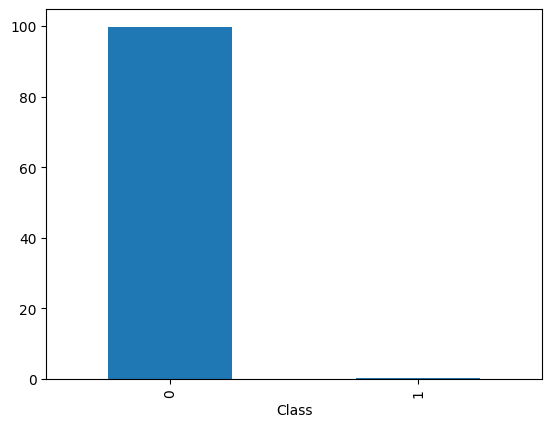

In [13]:
# checking the class distribution of target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.bar()

In [14]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

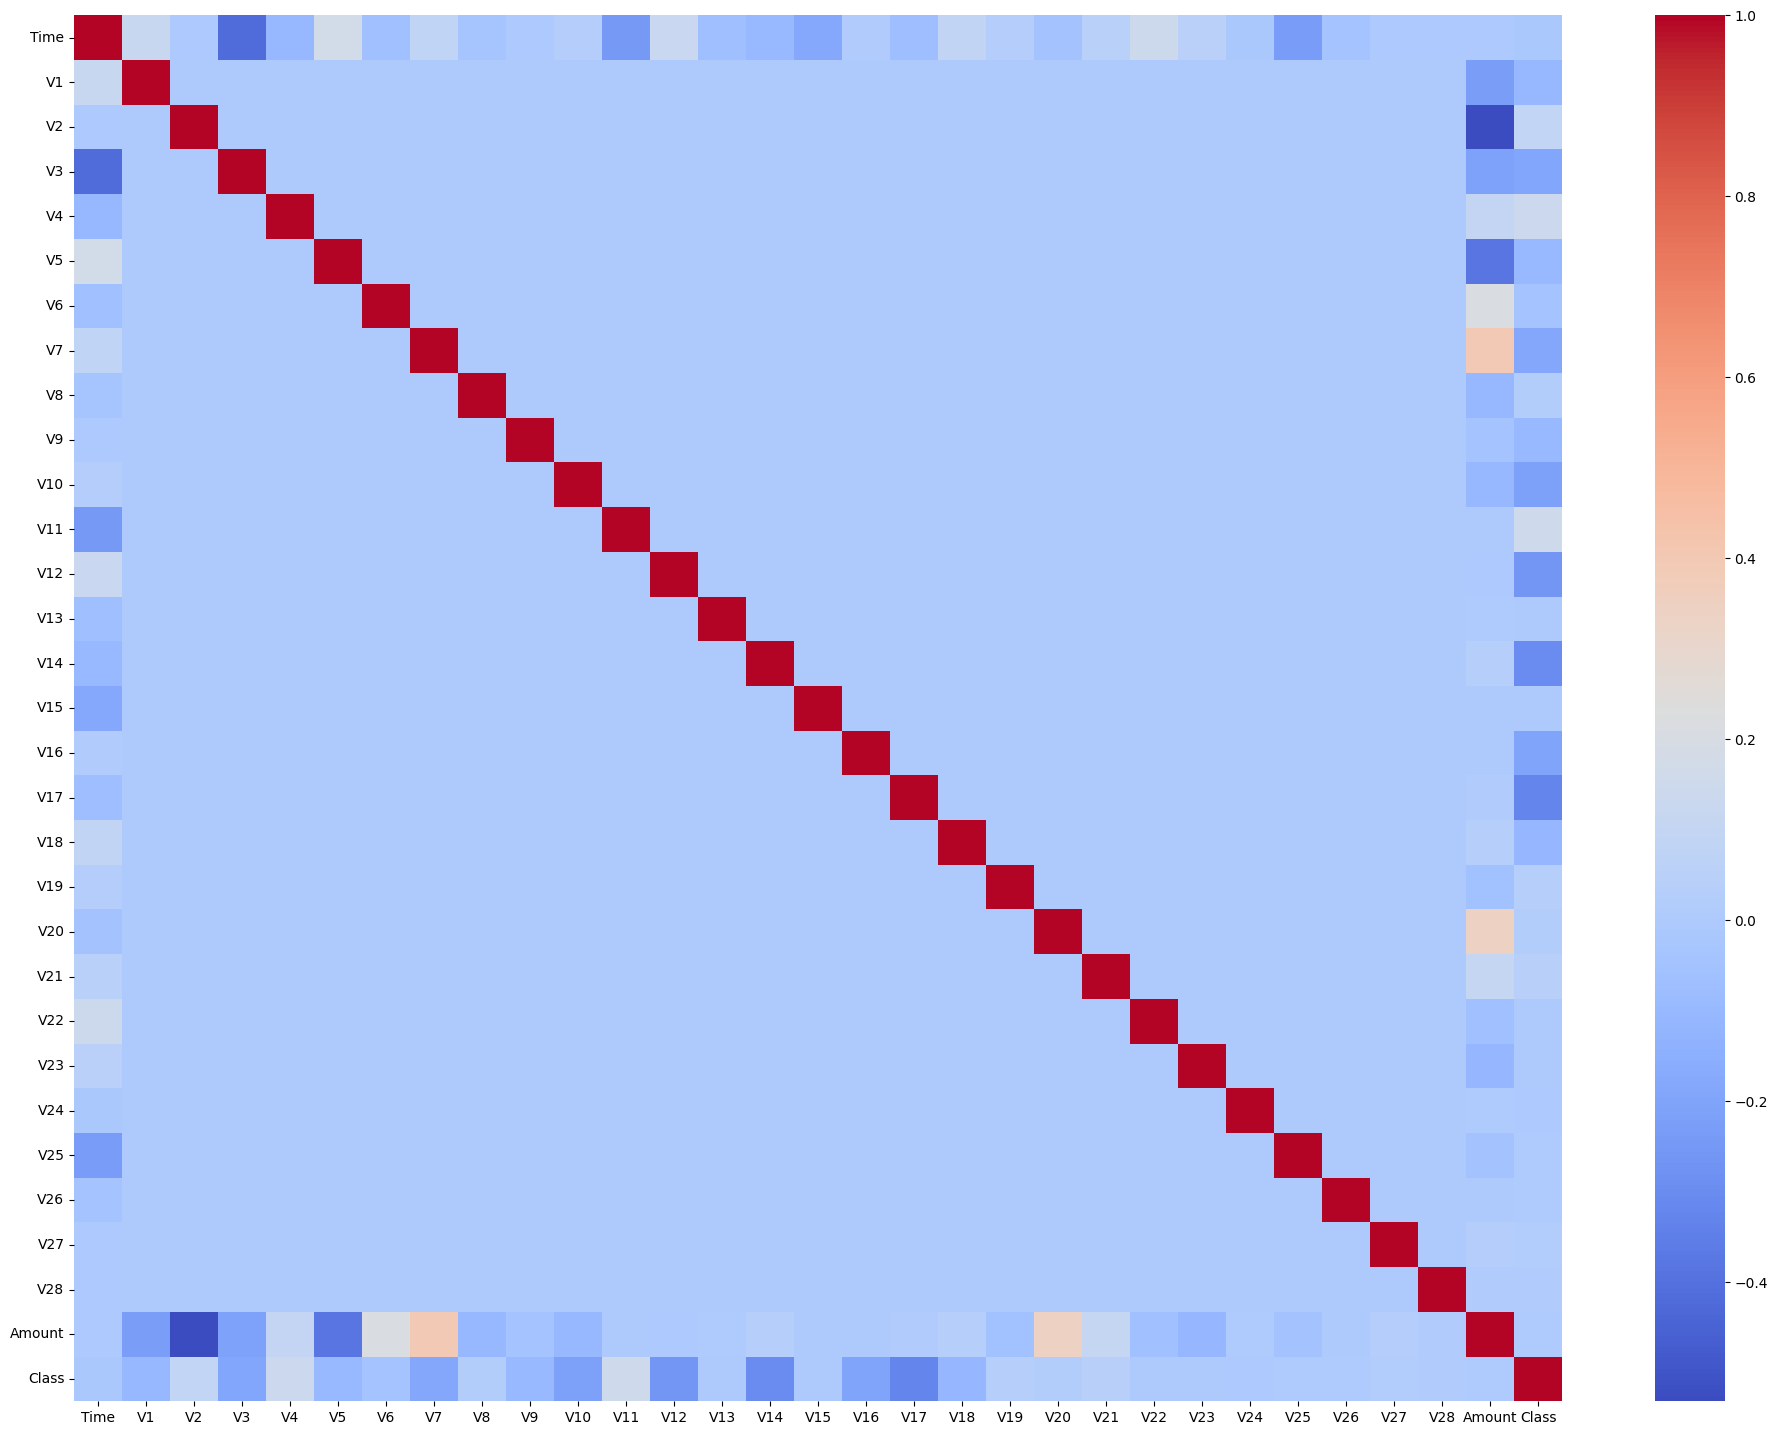

In [15]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),cmap='coolwarm')

In [16]:
# As time is given in relative fashion, we are using pandas timedelta which represents a duration, the differences between two times
Delta_Time=pd.to_timedelta(df['Time'], unit ='s')

# Create derived column hour
df['Time_hour']=(Delta_Time.dt.components.hours).astype(int)

In [17]:
df.drop(['Time'],axis=1, inplace=True)

## Splitting the data into train &test data

In [18]:
# Splitting the datasets into x & y
X=df.drop(['Class'],axis=1)
y=df['Class']

In [19]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [21]:
# Splitting the dataset using train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

### Plotting the distribution of variables

In [22]:
# Accumulating all the column names under one variable
cols=list(X.columns.values)

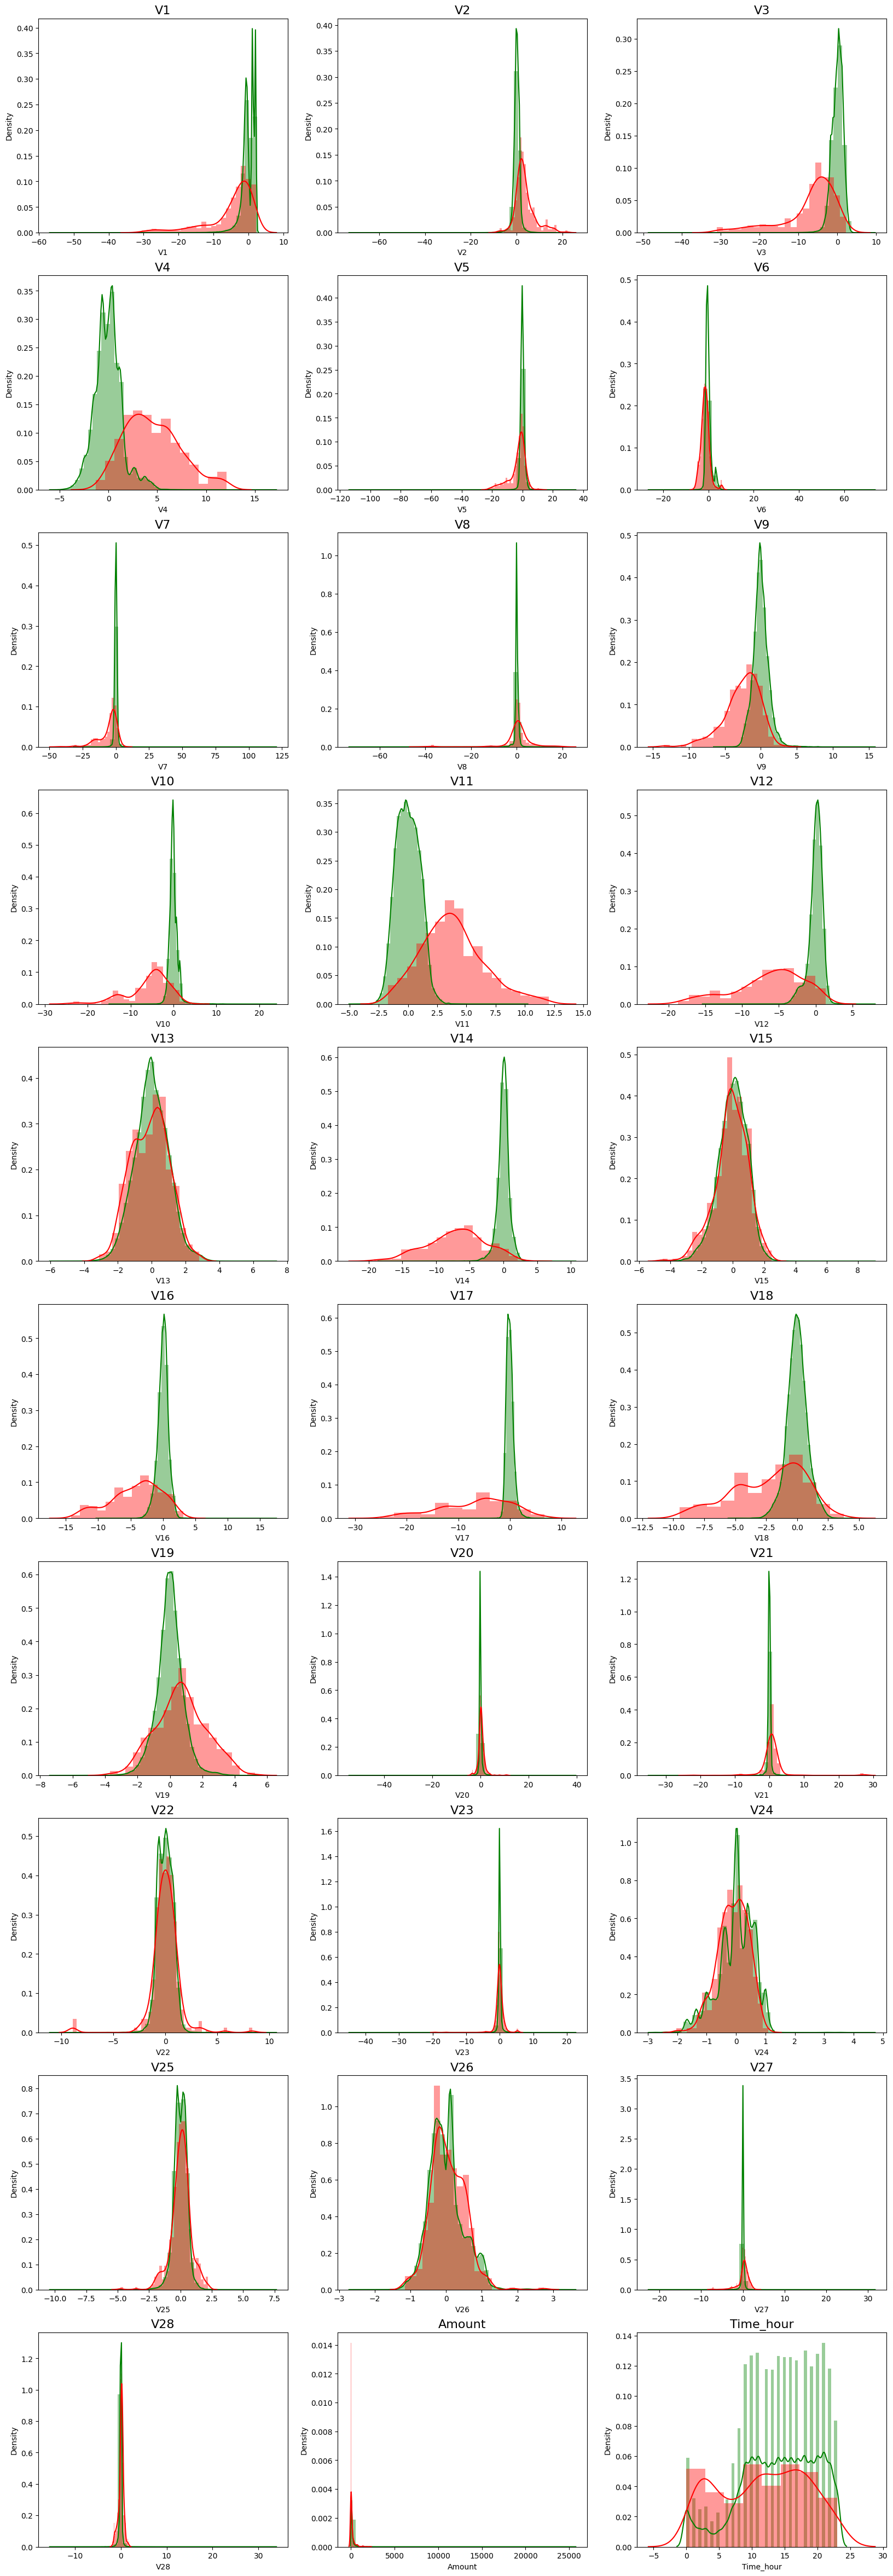

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records=df.Class ==0
fraud_records=df.Class==1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=16)
plt.show()

## Model Building

In [24]:
# Create a dataframe to store results
df_Results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [25]:
# Create a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm=confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames=['Non-Fraudent','Fraudent']
  plt.title('Confusion Matrix- Test Data')
  plt.ylabel('True Label')
  plt.xlabel('Predicated label')
  ticks=np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s=[['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+" =  "+ str(cm[i][j]), fontsize=12)
  plt.show()

In [26]:
#Create a common function to fit and predict on a logistic Refresssion model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C=list(np.power(10.0, np.arange(-10,10)))
  cv_num=KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2=linear_model.LogisticRegressionCV(
      Cs=num_C,
      penalty='l2',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='newton-cg',
      tol=10
  )
  searchCV_l1=linear_model.LogisticRegressionCV(
      Cs=num_C,
      penalty='l1',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='liblinear',
      tol=10
  )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print('Max auc_roc for l1:',searchCV_l1.scores_[1].mean(axis=0).max())
  print('Max auc_roc for l2:',searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularization")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularization")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)

  # find predicted values
  y_pred_l1=searchCV_l1.predict(X_test)
  y_pred_l2=searchCV_l2.predict(X_test)

  # find predicted probabilities
  y_pred_probs_l1=searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2=searchCV_l2.predict_proba(X_test)[:,1]

  # Accuracy of L1/L2 models
  Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1=metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print('Accuracy of Logistic model with l2 reglarization:{0}'. format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("Classification Report")
  print(classification_report(y_test, y_pred_l2))

  print('Accuracy of Logistic model with l1 reglarization:{0}'. format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("Classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value=roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value:{0}".format(l2_roc_value))
  fpr,tpr, thresholds=metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold : {0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Logistic Regression with L2 Regularization','Accuracy':Accuracy_l2, 'roc_value':l2_roc_value,'threshold':threshold},index=[0]), ignore_index=True)

  l1_roc_value=roc_auc_score(y_test, y_pred_probs_l1)
  print('l1 roc_value:{0}'.format(l1_roc_value))
  fpr, tpr, thresholds =metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold:{0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Logistic Regression with L1 Regularization','Accuracy':Accuracy_l1, 'roc_value':l1_roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results

In [27]:
#Create a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  # create a KNN model and fit the model with trained dataset
  knn=KNeighborsClassifier(n_neighbors=5, n_jobs=16)
  knn.fit(X_train, y_train)
  score=knn.score(X_test, y_test)
  print("model score")
  print(score)

  # Accuracy
  y_pred=knn.predict(X_test)
  KNN_accuracy=metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  knn_probs=knn.predict_proba(X_test)[:,1]

  # Calculate roc auc
  knn_roc_value=roc_auc_score(y_test, knn_probs)
  print("KNN roc_value:{0}".format(knn_roc_value))
  fpr,tpr, thresholds=metrics.roc_curve(y_test, knn_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print(" KNN threshold : {0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'KNN','Accuracy':score, 'roc_value':knn_roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results



In [28]:
#Create a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  # Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria=['gini','entropy']
  scores={}

  for c in criteria:
    dt=DecisionTreeClassifier(criterion=c, random_state=42)
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    test_score=dt.score(X_test, y_test)
    tree_preds=dt.predict_proba(X_test)[:,1]
    tree_roc_value=roc_auc_score(y_test, tree_preds)
    scores=test_score
    print(c+ " score:{0}".format(test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print(c+ " tree_roc_value:{0}".format(tree_roc_value))
    fpr,tpr, thresholds=metrics.roc_curve(y_test, tree_preds)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print(" Tree threshold : {0}".format(threshold))
    roc_auc=metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Tree Model with {0} criteria'.format(c),'Accuracy':test_score, 'roc_value':tree_roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results


In [29]:
#Create a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  # Evaluate Random Forest model

  # create the model with 100 trees
  RF_model=RandomForestClassifier(n_estimators=100,
                                 bootstrap=True,
                                 max_features='sqrt', random_state=42)


  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score=RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy:{0}'.format(RF_test_score))

  # Actual class predictions
  rf_predictions=RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("Classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs=RF_model.predict_proba(X_test)[:,1]

  # Calculate roc auc
  roc_value=roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value:{0}".format(roc_value))
  fpr,tpr, thresholds=metrics.roc_curve(y_test, rf_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print(" Random Forest threshold : {0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Random Forest','Accuracy':RF_test_score, 'roc_value':roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results

In [30]:
#Create a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  # Evaluate XGboost model
  XGBmodel=XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred=XGBmodel.predict(X_test)

  XGB_test_score=XGBmodel.score(X_test, y_test)
  print('Model Accuracy:{0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  # Probabilities for each class
  XGB_probs=XGBmodel.predict_proba(X_test)[:,1]

  # Calculate roc auc
  XGB_roc_value=roc_auc_score(y_test, XGB_probs)

  print("XGBoost roc_value:{0}".format(XGB_roc_value))
  fpr,tpr, thresholds=metrics.roc_curve(y_test, XGB_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print(" XGBoost threshold : {0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'XGBoost','Accuracy':XGB_test_score, 'roc_value':XGB_roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results

In [31]:
#Create a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  # Evaluate SVM model with sigmoid kernel model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf=SVC(kernel='sigmoid',random_state=42)
  clf.fit(X_train, y_train)
  y_pred_SVM =clf.predict(X_test)
  SVM_Score=accuracy_score(y_test, y_pred_SVM)
  print('accuracy score:{0}'.format(SVM_Score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("Classification Report")
  print(classification_report(y_test, y_pred_SVM))

  # Run classifier
  classifier=SVC(kernel='sigmoid', probability=True)
  svm_probs=classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

   # Calculate roc auc
  roc_value=roc_auc_score(y_test, svm_probs)

  print("SVM roc_value:{0}".format(roc_value))
  fpr,tpr, thresholds=metrics.roc_curve(y_test,svm_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print(" SVM threshold : {0}".format(threshold))

  roc_auc=metrics.auc(fpr, tpr)
  print("ROC for the test dataset", "{:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label=" Test, auc= "+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results=df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model':'SVM','Accuracy':SVM_Score, 'roc_value':roc_value,'threshold':threshold},index=[0]), ignore_index=True)
  return df_Results


 . Build different models on the imbalanced dataset and see the result

## Perform cross validation with Repeated KFold

In [32]:
# Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf=RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print('TRAIN:', train_index,   "TEST:", test_index)
  X_train_cv, X_test_cv =X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv =y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    14     23     28 ... 284787 284795 284799]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      4      5 ... 284793 284794 284798]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     3      7     10 ... 284788 284789 284805]
TRAIN: [     1      3      4 ... 284802 284804 284805] TEST: [     0      2      8 ... 284796 284803 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     6     12     13 ... 284801 284802 284804]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      4     15 ... 284774 284792 284796]
TRAIN: [     0      1      4 ... 284803 284804 284805] TEST: [     2      3      7 ... 284791 284802 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     8      9     18 ... 284793 284794 284800]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      6     17 ... 284788 284797 284803]
TRAIN: [     0     

Logistic Regression with L1 and L2 Regularization
Max auc_roc for l1: 0.9802846299024994
Max auc_roc for l2: 0.9884540420309081
Parameters for l1 regularization
[[-0.05516626 -0.12937569 -0.17836735  0.06221737 -0.25944545  0.09228783
   0.12356094 -0.03410156 -0.14331949 -0.14364213 -0.03491082  0.0117385
  -0.13968121 -0.22452007  0.01401392 -0.11542381 -0.22195417  0.03431759
   0.01111735  0.22919536  0.09026017 -0.02876739 -0.00997007 -0.00823864
  -0.02847819  0.00178319 -0.07152267 -0.00955763 -0.00659876 -0.11642513]]
[-2.10158727]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.47241034,
        0.47082039, 0.49782322, 0.87308903, 0.8903518 , 0.90562298,
        0.86787941, 0.88039089, 0.92440438, 0.90176781, 0.9109401 ,
        0.92587413, 0.87375354, 0.92022574, 0.89814522, 0.98913711],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54963196,
        0.55974398, 0.59171382, 0.85405746, 0.89030717, 0.91276177,
        0.8849088 , 0.88168415, 0.9112936

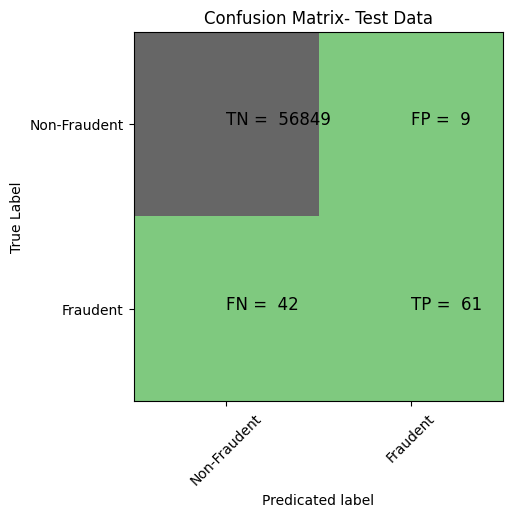

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.87      0.59      0.71       103

    accuracy                           1.00     56961
   macro avg       0.94      0.80      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 reglarization:0.9989290918347641
Confusion Matrix


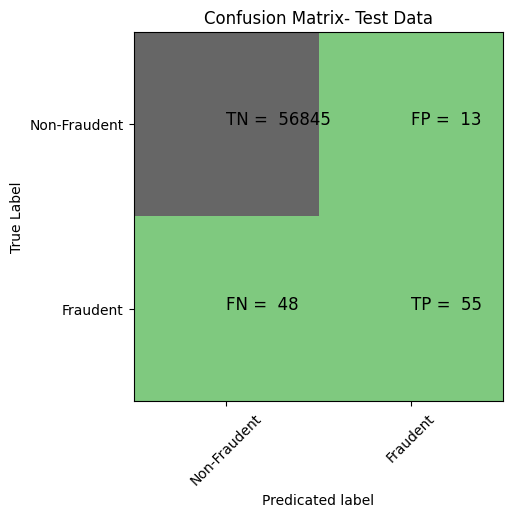

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.81      0.53      0.64       103

    accuracy                           1.00     56961
   macro avg       0.90      0.77      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value:0.965519620160871
l2 threshold : 0.0046079540060868516
ROC for the test dataset 96.6%


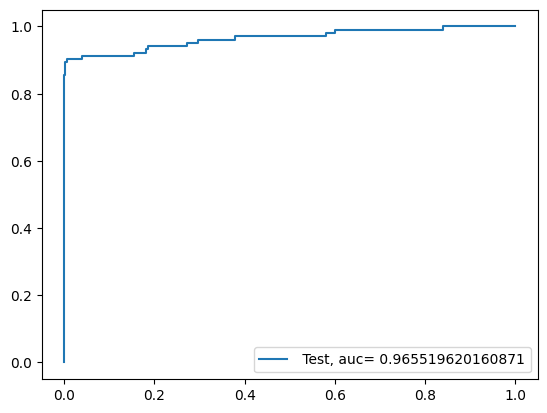

l1 roc_value:0.8888236987596762
l1 threshold:0.04954405717205995
ROC for the test dataset 88.9%


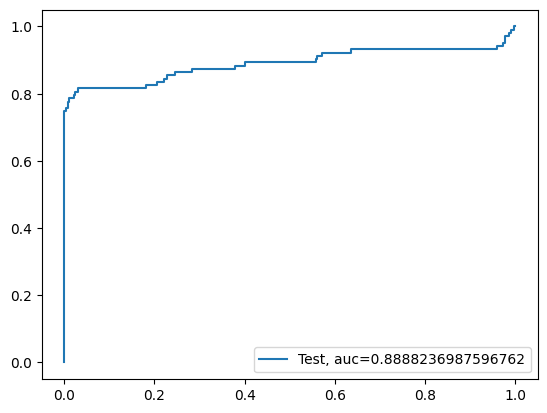

Time taken by Model:--- 186.75635862350464 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9992275416513052
Confusion Matrix


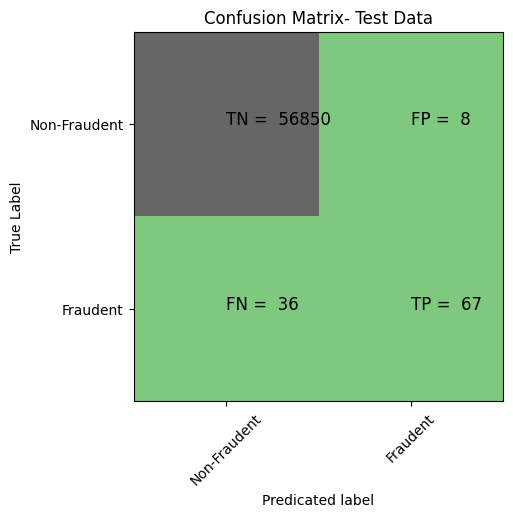

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.89      0.65      0.75       103

    accuracy                           1.00     56961
   macro avg       0.95      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value:0.8687287560528069
 KNN threshold : 0.2
ROC for the test dataset 86.9%


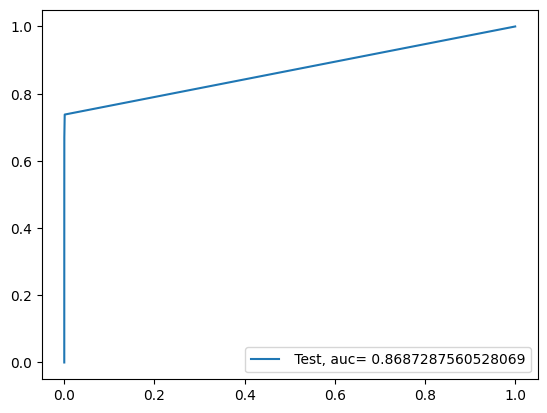

Time taken by Model:--- 145.48662304878235 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.9989993153210092
Confusion Matrix


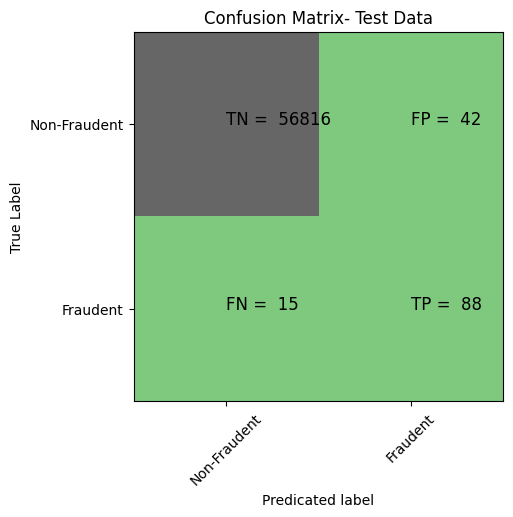

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.68      0.85      0.76       103

    accuracy                           1.00     56961
   macro avg       0.84      0.93      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.9268151248537064
 Tree threshold : 1.0
ROC for the test dataset 92.7%


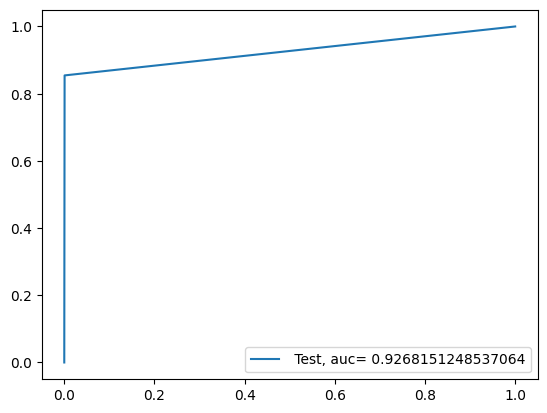

entropy score:0.9992099857797441
Confusion Matrix


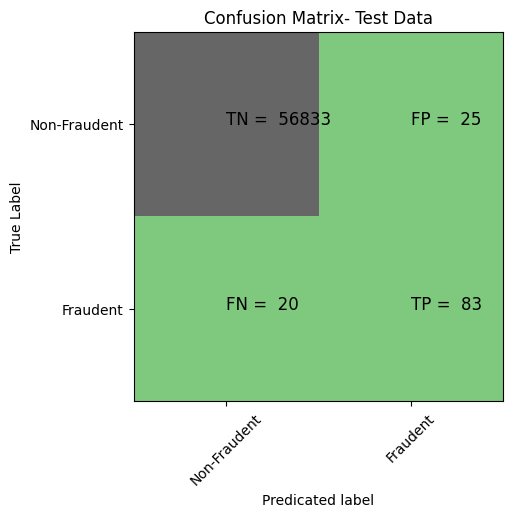

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.77      0.81      0.79       103

    accuracy                           1.00     56961
   macro avg       0.88      0.90      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.9026927754272523
 Tree threshold : 1.0
ROC for the test dataset 90.3%


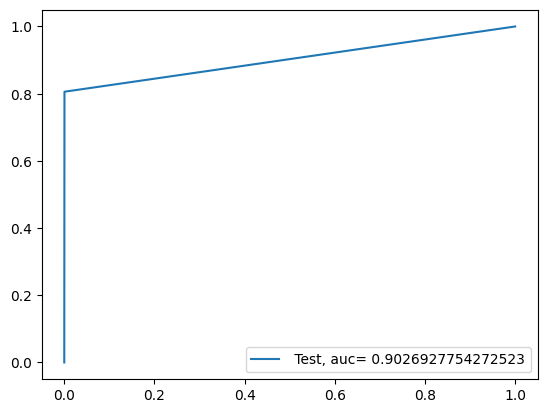

Time taken by Model:--- 28.986896991729736 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy:0.9995611032109689
Confusion Matrix


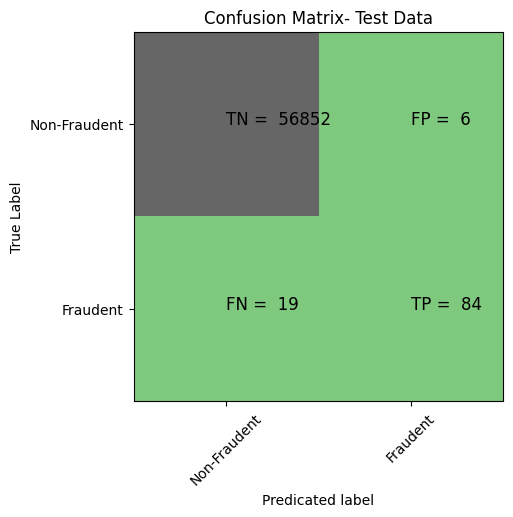

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.93      0.82      0.87       103

    accuracy                           1.00     56961
   macro avg       0.97      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9599765144780713
 Random Forest threshold : 0.02
ROC for the test dataset 96.0%


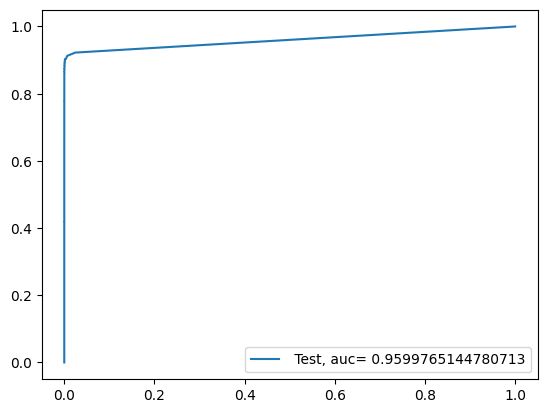

Time taken by Model:--- 198.39885210990906 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9995962149540913
Confusion Matrix


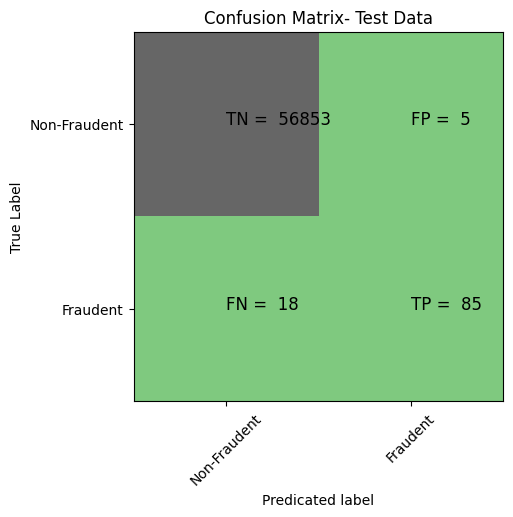

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.94      0.83      0.88       103

    accuracy                           1.00     56961
   macro avg       0.97      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value:0.9784378525005404
 XGBoost threshold : 0.00023703923216089606
ROC for the test dataset 97.8%


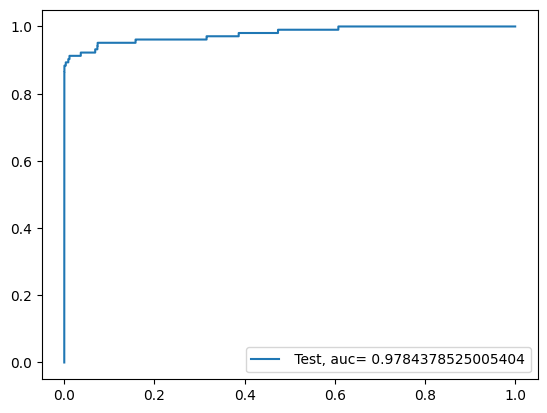

Time taken by Model:--- 76.19511342048645 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy score:0.9982795245869981
Confusion Matrix


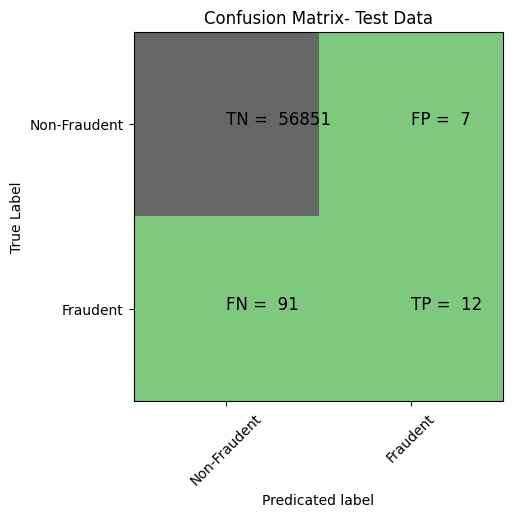

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.63      0.12      0.20       103

    accuracy                           1.00     56961
   macro avg       0.81      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value:0.4831913057465251
 SVM threshold : 0.0027633573370600155
ROC for the test dataset 48.3%


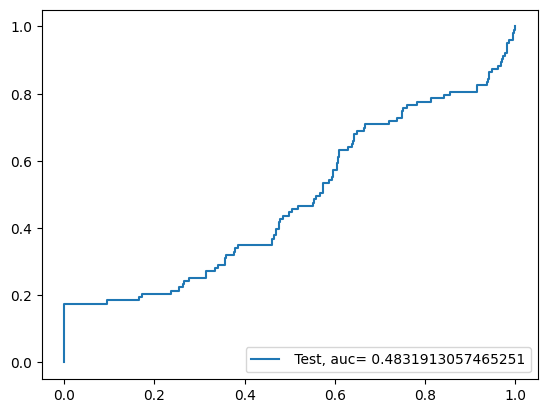

Time taken by Model:--- 564.4141900539398 seconds ---
------------------------------------------------------------


In [33]:
# Run logistic Regression with L1 and L2 regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results=buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results=buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time=time.time()
df_Results=buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

In [34]:
# Checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.999105,0.965520,0.004608
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998929,0.888824,0.049544
2,RepeatedKFold Cross Validation,KNN,0.999228,0.868729,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.926815,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999210,0.902693,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.959977,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.978438,0.000237
7,RepeatedKFold Cross Validation,SVM,0.998280,0.483191,0.002763


## Results for cross validation with RepeatedKFold:
Looking at Accuracy and ROC value we have "Logistic Regression with L2 Regualrization" which has provided best results for cross validation with RepeatedKFold technique

## Perform cross validation with StratifiedKFold

In [35]:
# Lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
rkf=StratifiedKFold(n_splits=5, random_state=None)

# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print('TRAIN:', train_index,   "TEST:", test_index)
  X_train_SKF_cv, X_test_SKF_cv =X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv =y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 Regularization
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.9824998302436573
Parameters for l1 regularization
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.9448154

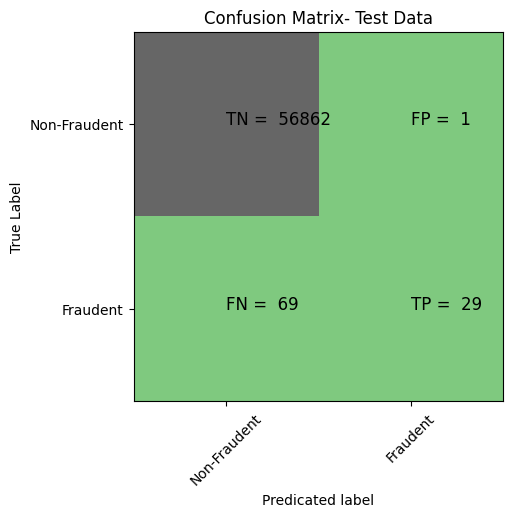

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 reglarization:0.9987535331191517
Confusion Matrix


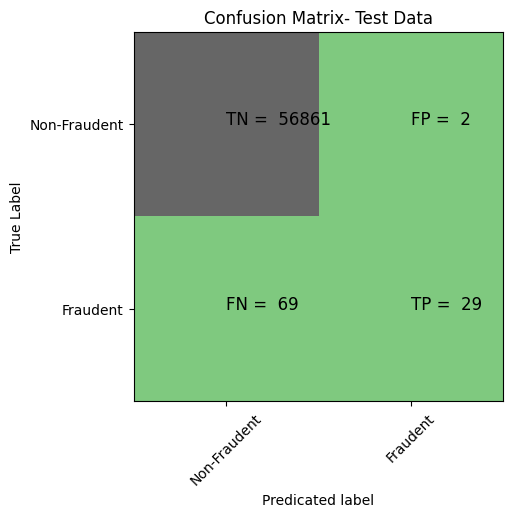

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value:0.9833866719401124
l2 threshold : 0.0015540600590433185
ROC for the test dataset 98.3%


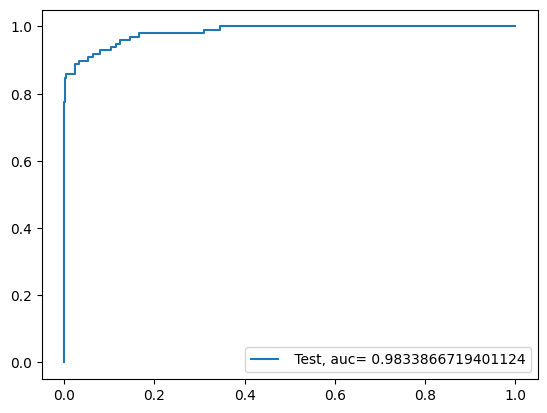

l1 roc_value:0.8890758561483437
l1 threshold:0.021087492766199863
ROC for the test dataset 88.9%


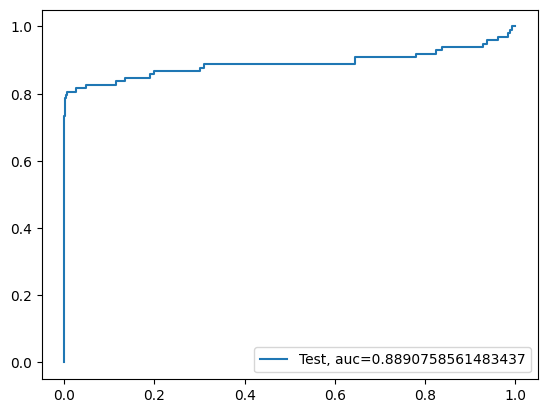

Time taken by Model:--- 200.73326706886292 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


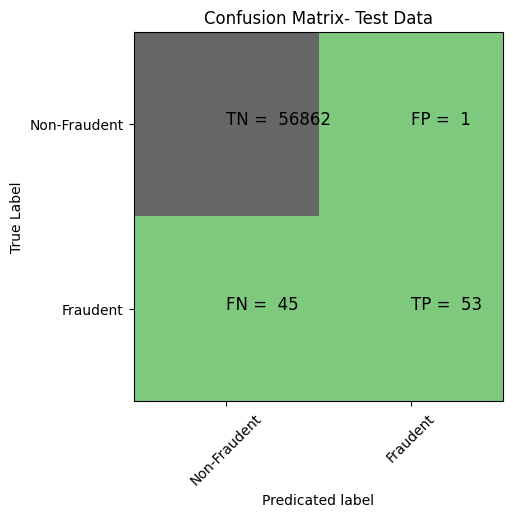

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value:0.8057457828285457
 KNN threshold : 0.2
ROC for the test dataset 80.6%


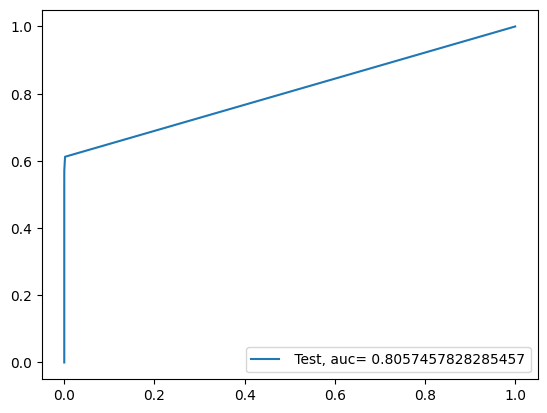

Time taken by Model:--- 146.72672295570374 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.998841312476958
Confusion Matrix


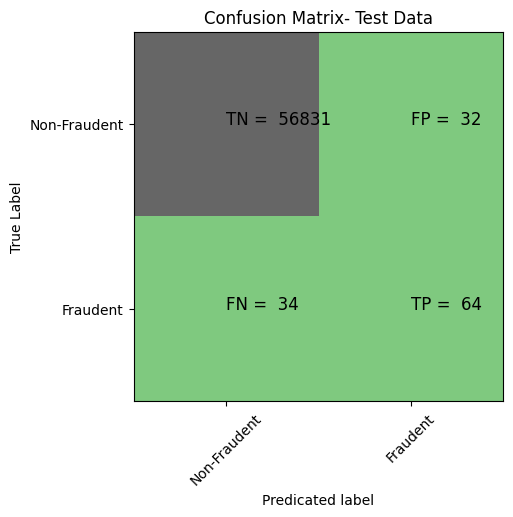

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8262492341959029
 Tree threshold : 1.0
ROC for the test dataset 82.6%


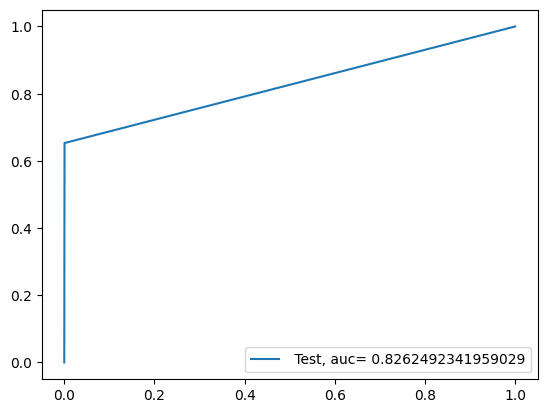

entropy score:0.9990168711925703
Confusion Matrix


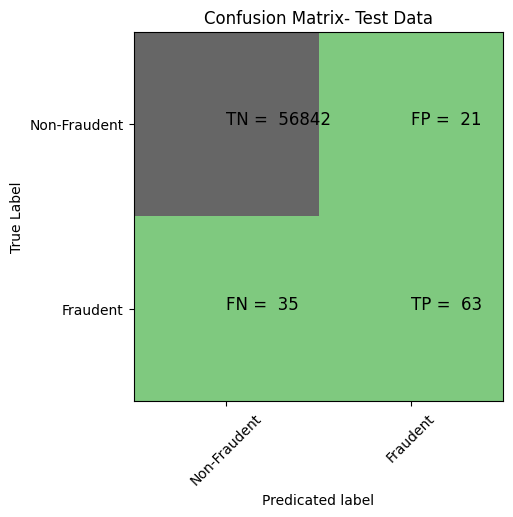

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8212439170839185
 Tree threshold : 1.0
ROC for the test dataset 82.1%


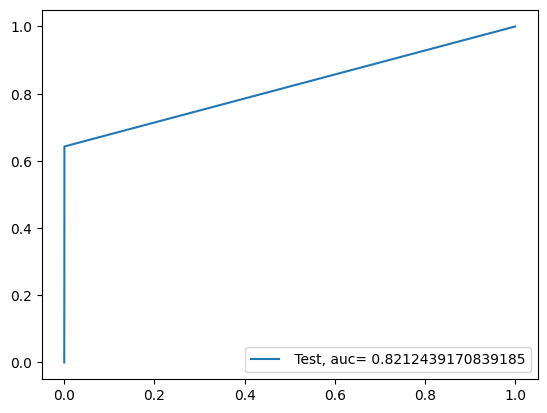

Time taken by Model:--- 29.488494873046875 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy:0.9994382121100402
Confusion Matrix


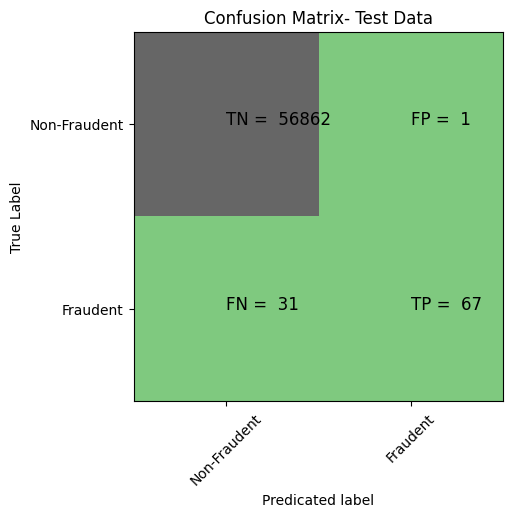

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9464721329855826
 Random Forest threshold : 0.01
ROC for the test dataset 94.6%


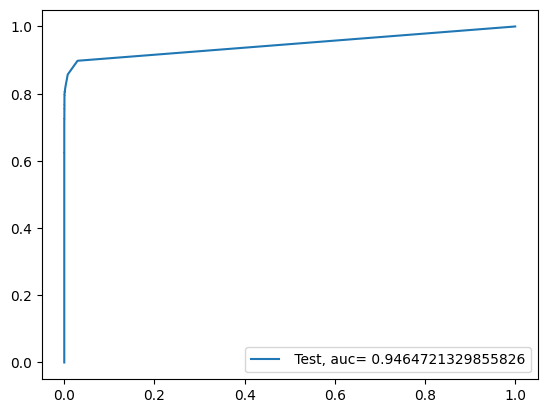

Time taken by Model:--- 196.34539079666138 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994382121100402
Confusion Matrix


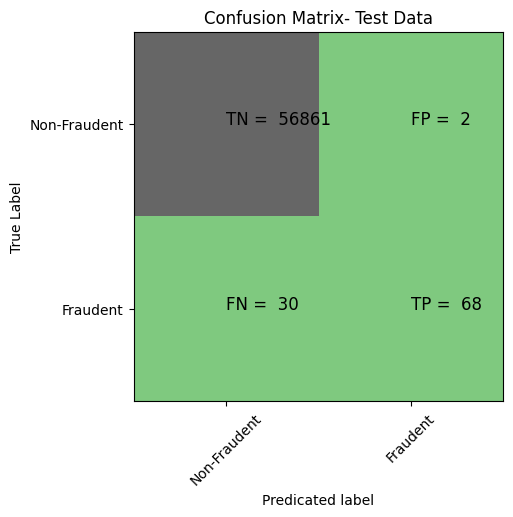

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value:0.9728125638170081
 XGBoost threshold : 0.00010038274194812402
ROC for the test dataset 97.3%


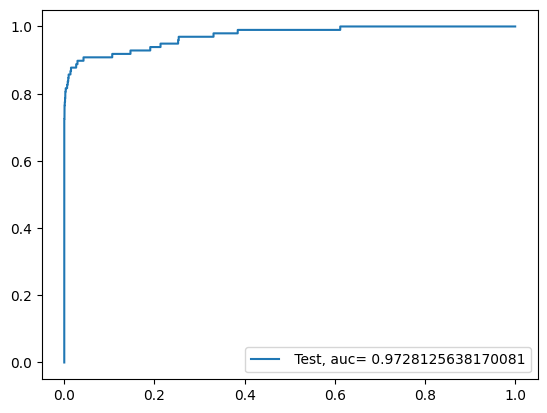

Time taken by Model:--- 76.51199460029602 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy score:0.9982795245869981
Confusion Matrix


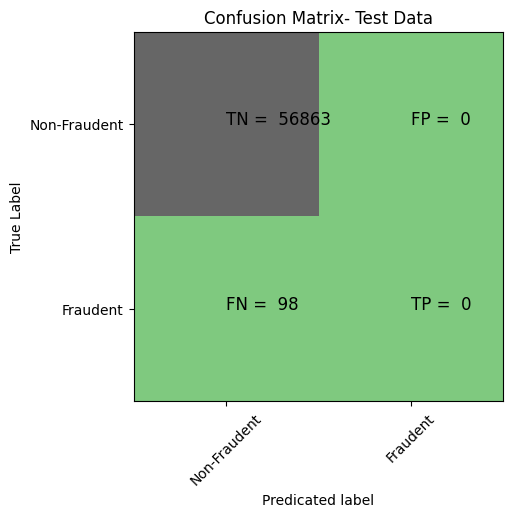

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value:0.40177034885494567
 SVM threshold : 0.0043391707777685855
ROC for the test dataset 40.2%


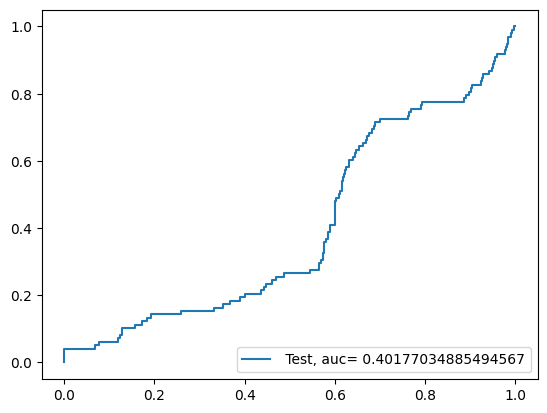

Time taken by Model:--- 164.66317582130432 seconds ---
------------------------------------------------------------


In [36]:
# Run Logistic Regression with L1 and L2 regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results=buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results=buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time=time.time()
df_Results=buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by Model:--- %s seconds ---" % (time.time()-start_time))
print('-'*60)

In [37]:
# Checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.999105,0.965520,0.004608
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998929,0.888824,0.049544
2,RepeatedKFold Cross Validation,KNN,0.999228,0.868729,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.926815,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999210,0.902693,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.959977,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.978438,0.000237
7,RepeatedKFold Cross Validation,SVM,0.998280,0.483191,0.002763
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087


### Results for cross validation with StratifiedKFold:
Looking at Accuracy and ROC value we have Logistic Regression with L2 Regualrization has provided best results for cross validation with StratifiedKFold technique

## Conclusion:
* As the results show Logistic with L2 Regularization for StratifiedKFold cross validation provided best results

### Proceed with the model which shows the best result
* Apply the best hyperparameter on the model
* Predict on the test dataset

In [38]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold

num_C=list(np.power(10.0, np.arange(-10,10)))
cv_num=KFold(n_splits=10, shuffle=True, random_state=42)

clf=linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print('Max auc_roc for l2:',clf.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularization")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

# find predicted values
y_pred_l2=clf.predict(X_test)

# find predicted probabilities
y_pred_probs_l2=clf.predict_proba(X_test)[:,1]

# Accuracy of L1/L2 models
Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print('Accuracy of Logistic model with l2 reglarization:{0}'. format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value=roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value:{0}".format(l2_roc_value))
fpr,tpr, thresholds=metrics.roc_curve(y_test, y_pred_probs_l2)
threshold=thresholds[np.argmax(tpr-fpr)]
print("l2 threshold : {0}".format(threshold))

Max auc_roc for l2: 0.9824998302436573
Parameters for l2 regularization
[[ 0.00683334  0.06145934 -0.06703104  0.21837008  0.05400372 -0.0319603
  -0.02280335 -0.1149601  -0.06954056 -0.16366435  0.12779    -0.19159896
  -0.03711445 -0.36059637  0.00364854 -0.08799108 -0.07288165 -0.0007583
   0.00394511 -0.0279599   0.03822224  0.02337054 -0.01173993 -0.00997821
  -0.00657592  0.00627513 -0.01025023 -0.00174467  0.00039791 -0.00096784]]
[-7.40641365]
{1: array([[0.69243733, 0.69420152, 0.71447107, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99464431, 0.99129517, 0.99071237,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601],
       [0.60700243, 0.60865586, 0.62914551, 0.76884136, 0.90900227,
        0.94879974, 0.9604112 , 0.98181412, 0.98547001, 0.98328227,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955152,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955

In [39]:
# Checking for the coefficient values
clf.coef_

array([[ 0.00683334,  0.06145934, -0.06703104,  0.21837008,  0.05400372,
        -0.0319603 , -0.02280335, -0.1149601 , -0.06954056, -0.16366435,
         0.12779   , -0.19159896, -0.03711445, -0.36059637,  0.00364854,
        -0.08799108, -0.07288165, -0.0007583 ,  0.00394511, -0.0279599 ,
         0.03822224,  0.02337054, -0.01173993, -0.00997821, -0.00657592,
         0.00627513, -0.01025023, -0.00174467,  0.00039791, -0.00096784]])

In [40]:
# Creating the dataframes with the coefficient values
coefficients=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis=1)
coefficients.columns=['Feature','Importance Coefficient']

In [41]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006833
1,V2,0.061459
2,V3,-0.067031
3,V4,0.218370
4,V5,0.054004
5,V6,-0.031960
6,V7,-0.022803
7,V8,-0.114960
8,V9,-0.069541
9,V10,-0.163664


## Print the important features of the best model to understand the dataset
* This will not give much explanation on the already transformed dataset
* Built it will help us in understsanding if the dataset is not PCA transformed

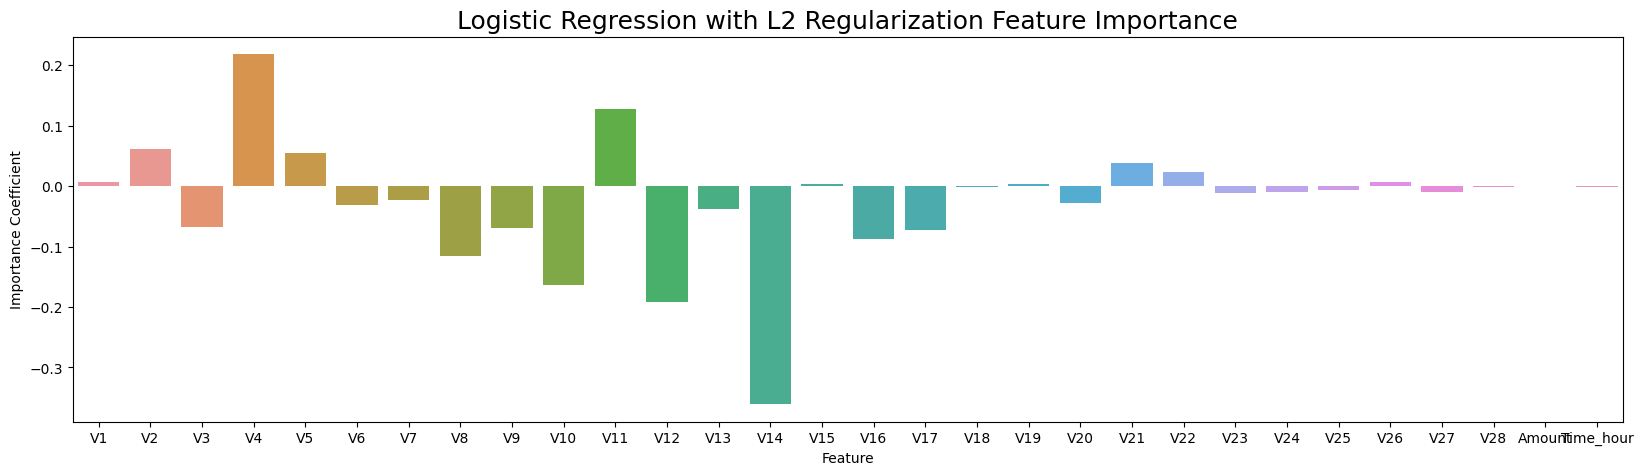

In [42]:
# Plotting the coefficients values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Importance Coefficient',data=coefficients)
plt.title("Logistic Regression with L2 Regularization Feature Importance", fontsize=18)

plt.show()

Hence it implies that V4, v5, V11 has +ve importance whereas V10, V12, V14 seems to have -ve impact on the predications

## Model building with balancing Classes
_Perform class balancing with:_
* Random Oversampling
* SMOTE
* ADASYN

## Oversampling with RandomOverSampler with StratifiedKFold Cross Validation
* We will use Random Oversampling method to handle the class imbalance

In [43]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf=StratifiedKFold(n_splits=5, random_state=None)

for fold , (train_index,test_index) in enumerate(skf.split(X,y),1):
  X_train=X.loc[train_index]
  y_train=y.loc[train_index]
  X_test=X.loc[test_index]
  y_test=y.loc[test_index]
  ROS=RandomOverSampler(sampling_strategy=0.5)
  X_over, y_over=ROS.fit_resample(X_train, y_train)

X_over=pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 and L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9866069991815373
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

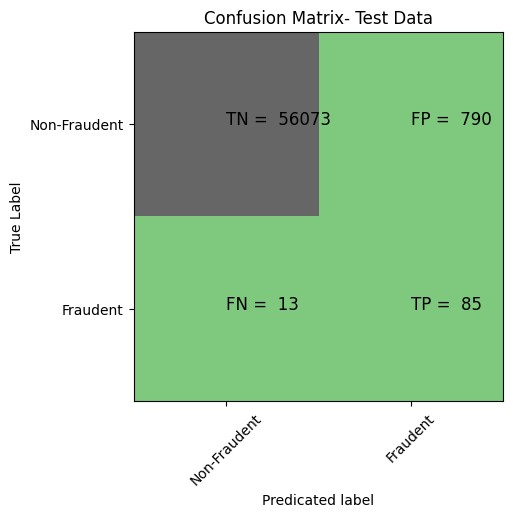

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of Logistic model with l1 reglarization:0.9982795245869981
Confusion Matrix


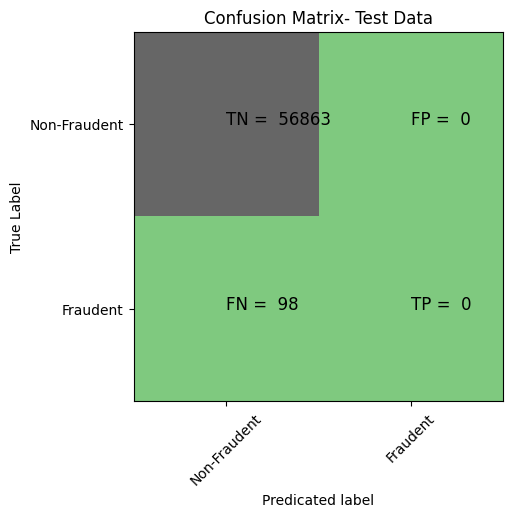

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value:0.9807308077021498
l2 threshold : 0.435940574453074
ROC for the test dataset 98.1%


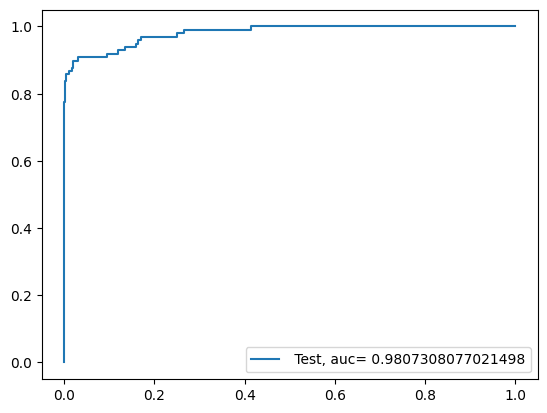

l1 roc_value:0.5
l1 threshold:1.5
ROC for the test dataset 50.0%


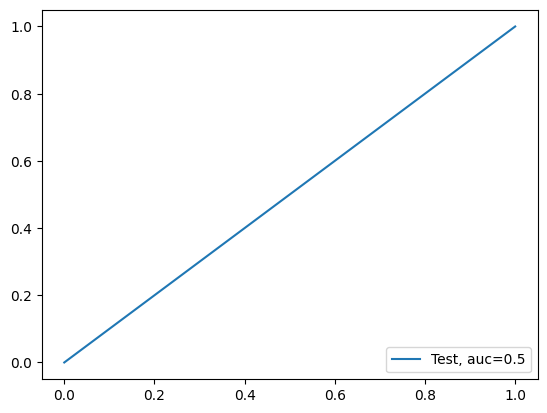

Time Taken by Model: ---- 261.4743421077728 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


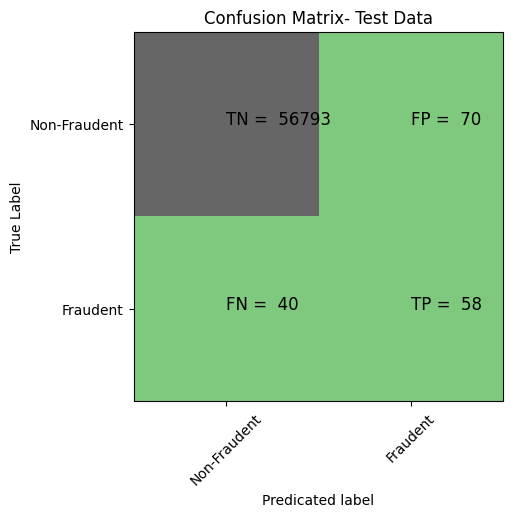

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value:0.805604465728046
 KNN threshold : 0.2
ROC for the test dataset 80.6%


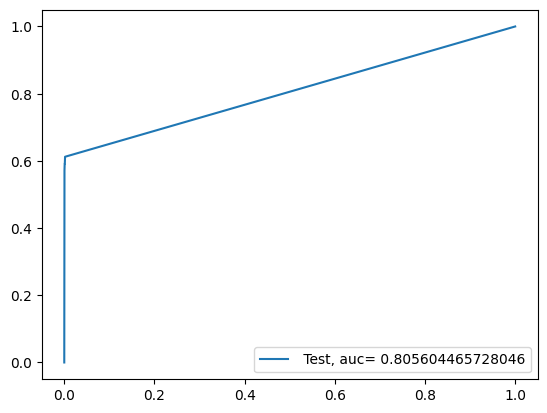

Time Taken by Model: ---- 217.38996005058289 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' &'entropy' criteria 
gini score:0.9989993153210092
Confusion Matrix


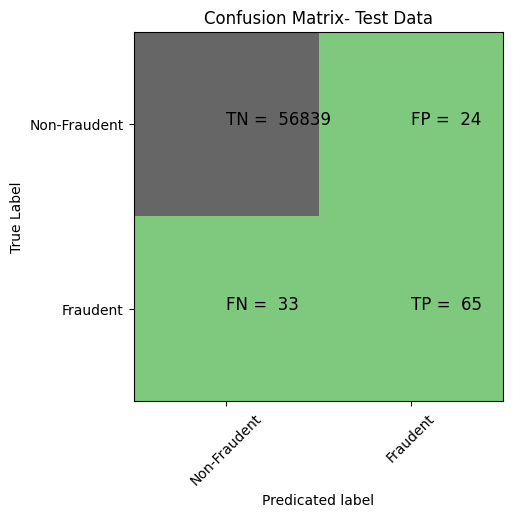

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.66      0.70        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8314216195244782
 Tree threshold : 1.0
ROC for the test dataset 83.1%


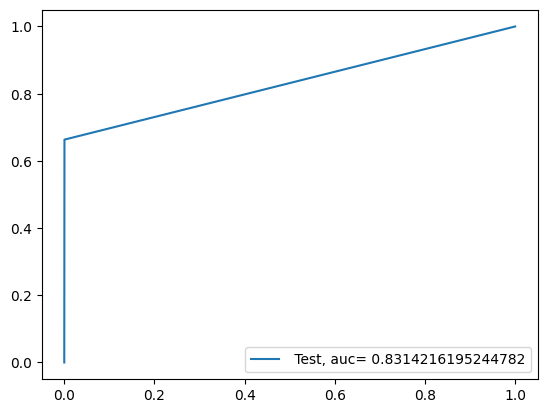

entropy score:0.9990870946788153
Confusion Matrix


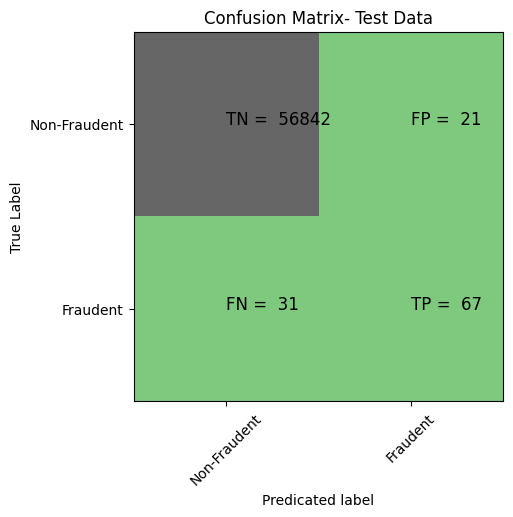

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.68      0.72        98

    accuracy                           1.00     56961
   macro avg       0.88      0.84      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8416520803492247
 Tree threshold : 1.0
ROC for the test dataset 84.2%


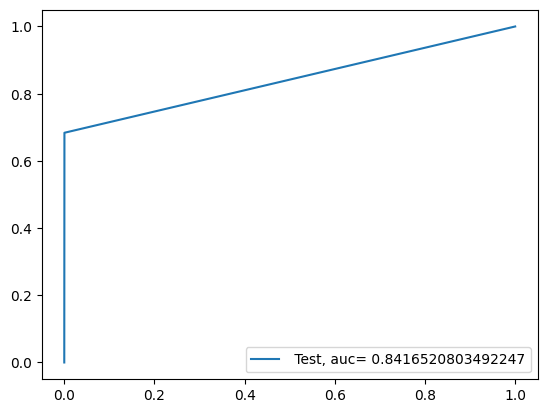

Time Taken by Model: ---- 20.709545850753784 seconds ----
------------------------------------------------------------
Random Forest Model
Model Accuracy:0.9995084355962852
Confusion Matrix


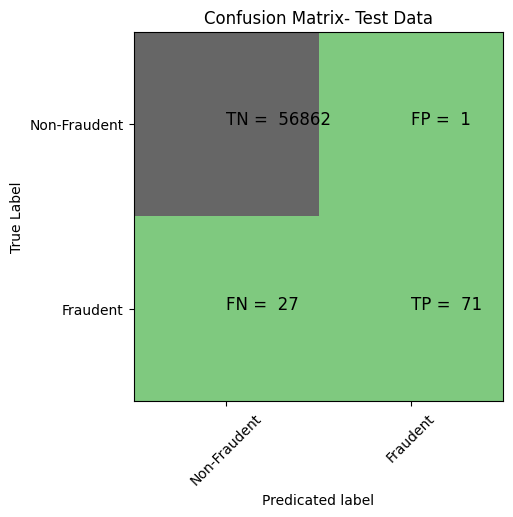

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9354393499305707
 Random Forest threshold : 0.02
ROC for the test dataset 93.5%


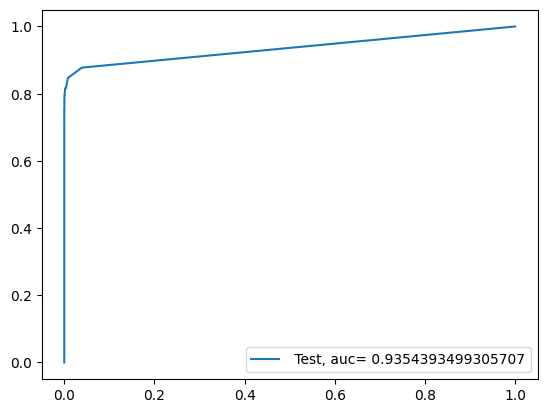

Time Taken by Model: ---- 152.59863305091858 seconds ----
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994557679816014
Confusion Matrix


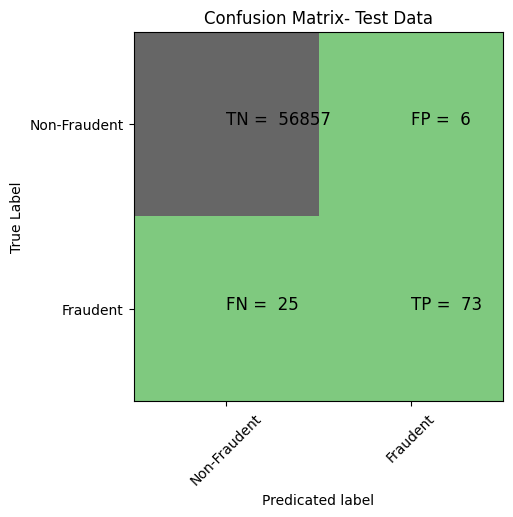

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value:0.977576789469283
 XGBoost threshold : 0.00015621633792761713
ROC for the test dataset 97.8%


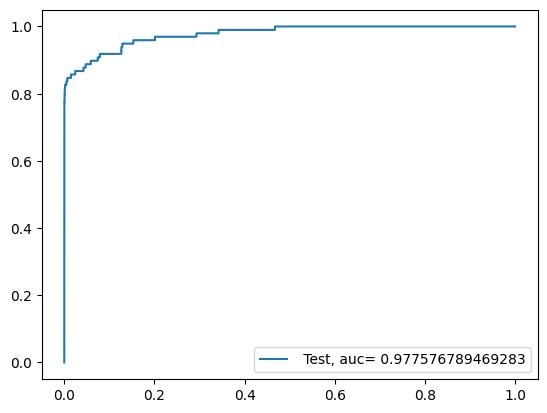

Time Taken by Model: ---- 100.13649320602417 seconds ----
------------------------------------------------------------


In [44]:
Data_Imbalance_Handling   ="Random Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 and L2 Regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' &'entropy' criteria
print("Decision Tree Models with 'gini' &'entropy' criteria ")
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results=buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results=buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time=time.time()
# df_Results=buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
# print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
# print('-'*60)

In [45]:
 # Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.999105,0.965520,0.004608
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998929,0.888824,0.049544
2,RepeatedKFold Cross Validation,KNN,0.999228,0.868729,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.926815,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999210,0.902693,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.959977,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.978438,0.000237
7,RepeatedKFold Cross Validation,SVM,0.998280,0.483191,0.002763
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087


## Results for Random Oversampling with StratifiedKFold technique:
Looking at the Accuracy and ROC value we have XGBoost which has the provided best results for Random Oversampling and StratifiedKFold technique

## Oversampling with SMOTE Oversampling
* We will use SMOTE Oversampling method to handle the class imbalance

In [46]:
# Creating the dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf=StratifiedKFold(n_splits=5, random_state=None)

for fold , (train_index,test_index) in enumerate(skf.split(X,y),1):
  X_train=X.loc[train_index]
  y_train=y.loc[train_index]
  X_test=X.loc[test_index]
  y_test=y.loc[test_index]
  SMOTE=over_sampling.SMOTE(random_state=0)
  X_train_Smote, y_train_Smote=SMOTE.fit_resample(X_train, y_train)

X_train_Smote=pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression with L1 and L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9930151908600335
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

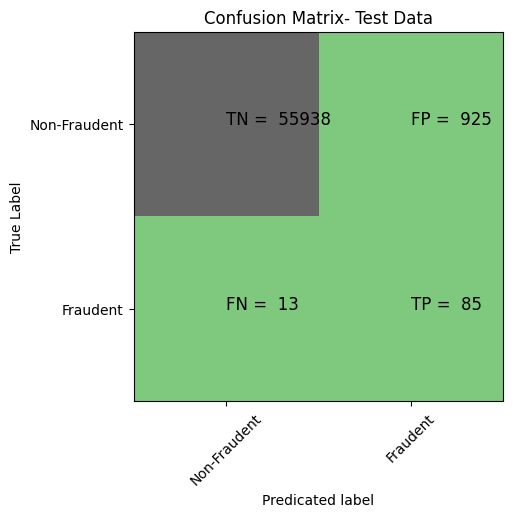

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy of Logistic model with l1 reglarization:0.9982795245869981
Confusion Matrix


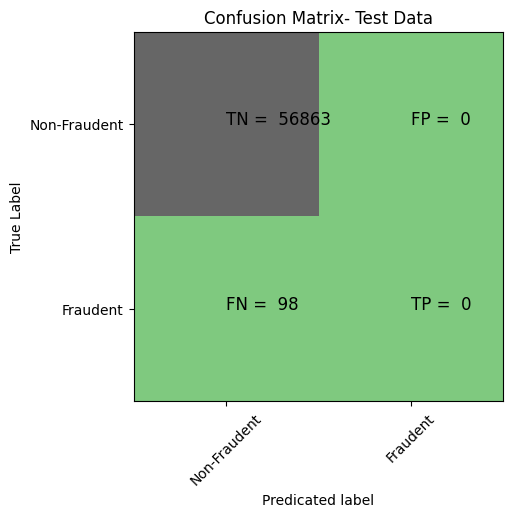

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value:0.9745828408918391
l2 threshold : 0.3939516300872773
ROC for the test dataset 97.5%


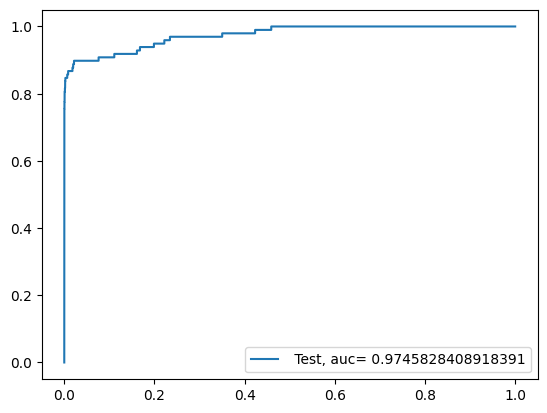

l1 roc_value:0.5
l1 threshold:1.5
ROC for the test dataset 50.0%


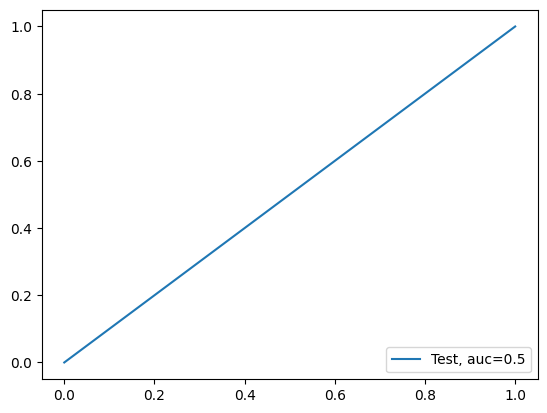

Time Taken by Model: ---- 316.49143743515015 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


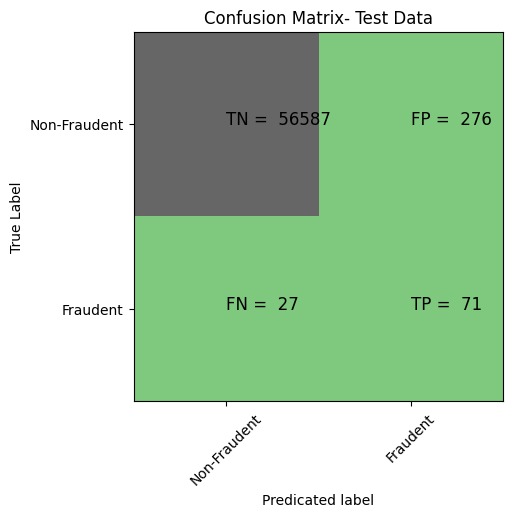

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value:0.8602674455287628
 KNN threshold : 0.6
ROC for the test dataset 86.0%


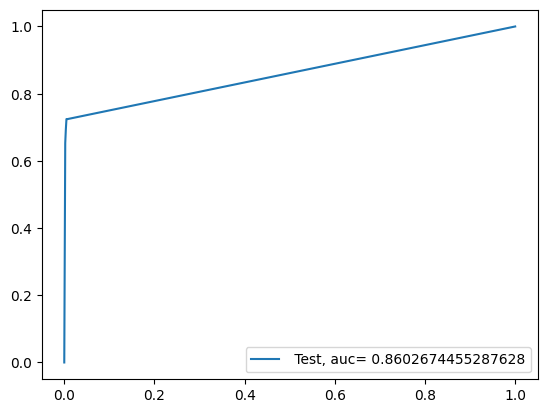

Time Taken by Model: ---- 291.23772263526917 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' &'entropy' criteria 
gini score:0.9977528484401608
Confusion Matrix


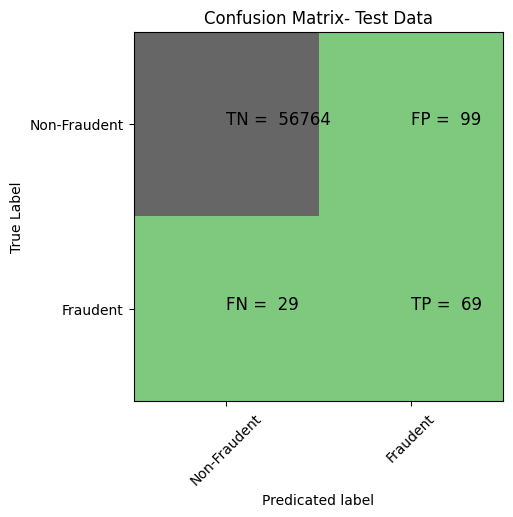

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8511703029874526
 Tree threshold : 1.0
ROC for the test dataset 85.1%


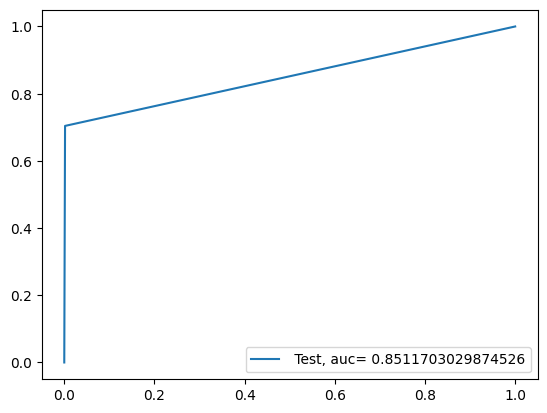

entropy score:0.9969803900914661
Confusion Matrix


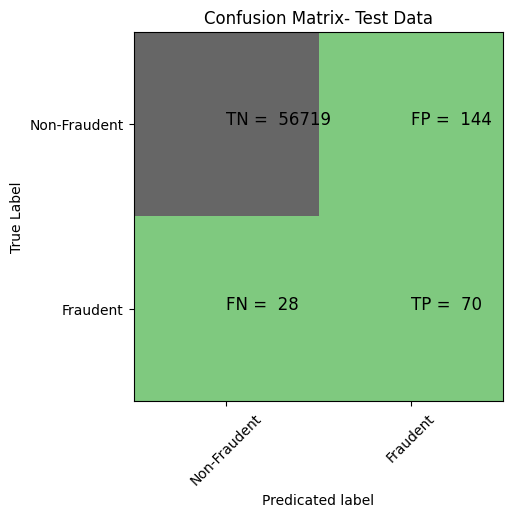

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8558766559223799
 Tree threshold : 1.0
ROC for the test dataset 85.6%


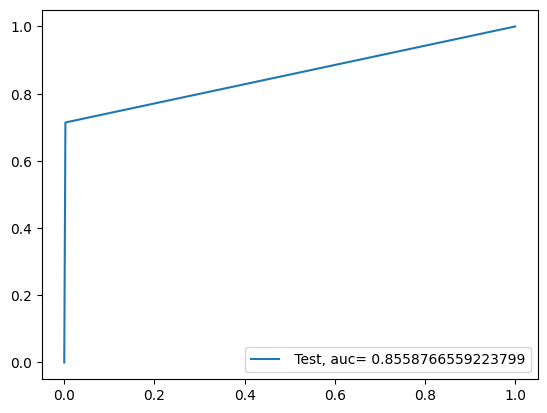

Time Taken by Model: ---- 69.45657849311829 seconds ----
------------------------------------------------------------
Random Forest Model
Model Accuracy:0.999490879724724
Confusion Matrix


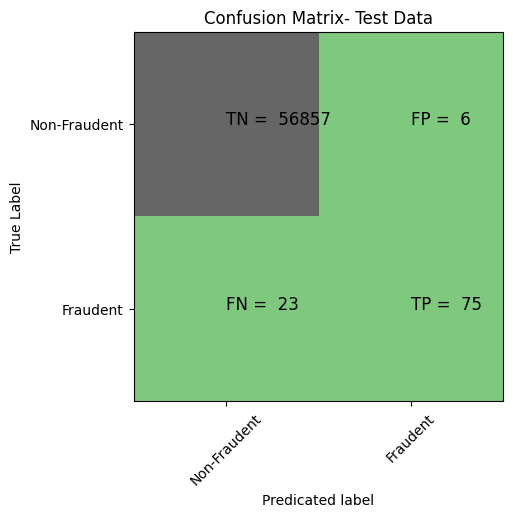

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9614705879186172
 Random Forest threshold : 0.05
ROC for the test dataset 96.1%


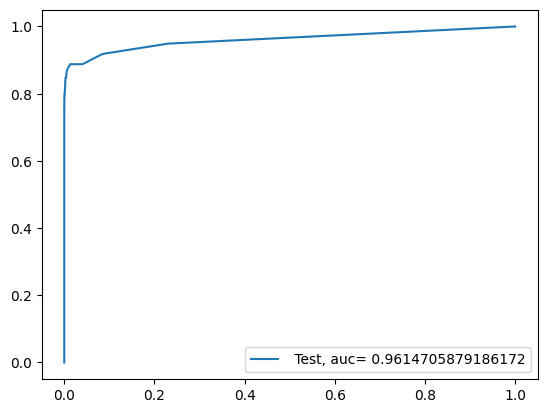

Time Taken by Model: ---- 347.9266149997711 seconds ----
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994382121100402
Confusion Matrix


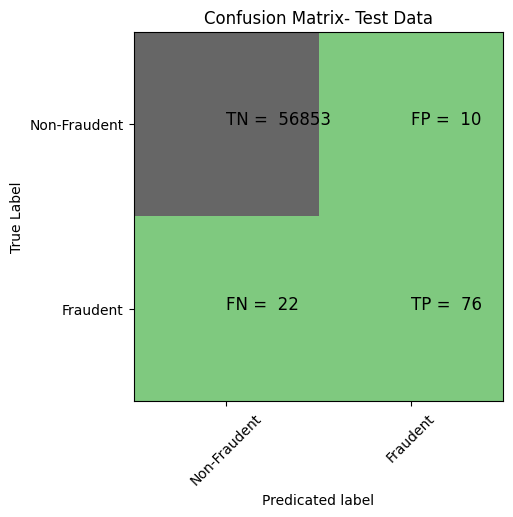

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value:0.974152698555461
 XGBoost threshold : 0.00022058551257941872
ROC for the test dataset 97.4%


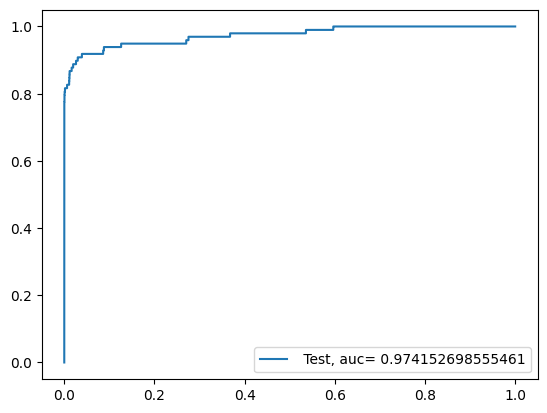

Time Taken by Model: ---- 196.26185727119446 seconds ----
------------------------------------------------------------


In [47]:
Data_Imbalance_Handling   ="Random Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 and L2 Regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' &'entropy' criteria
print("Decision Tree Models with 'gini' &'entropy' criteria ")
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results=buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results=buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time=time.time()
# df_Results=buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
# print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
# print('-'*60)

In [48]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.999105,0.965520,0.004608
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998929,0.888824,0.049544
2,RepeatedKFold Cross Validation,KNN,0.999228,0.868729,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.926815,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999210,0.902693,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.959977,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.978438,0.000237
7,RepeatedKFold Cross Validation,SVM,0.998280,0.483191,0.002763
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087


## Results for SMOTE Oversampling with StratifiedKFold:
Looking at the Accuracy and ROC value we have provided best results for SMOTE Oversampling with StratifiedKFold technique

## Oversampling with ADASYN Oversampling
* We will use ADASYN Oversampling method to handle the class imbalance

In [49]:
# Creating the dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf=StratifiedKFold(n_splits=5, random_state=None)

for fold , (train_index,test_index) in enumerate(skf.split(X,y),1):
  X_train=X.loc[train_index]
  y_train=y.loc[train_index]
  X_test=X.loc[test_index]
  y_test=y.loc[test_index]
  ADASYN=over_sampling.ADASYN(random_state=0)
  X_train_ADASYN, y_train_ADASYN=ADASYN.fit_resample(X_train, y_train)

X_train_ADSYN=pd.DataFrame(data=X_train_ADASYN, columns=cols)

Logistic Regression with L1 and L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9835137791366966
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

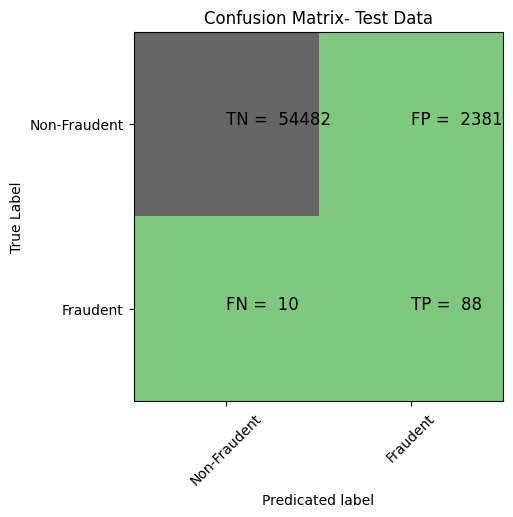

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy of Logistic model with l1 reglarization:0.9982795245869981
Confusion Matrix


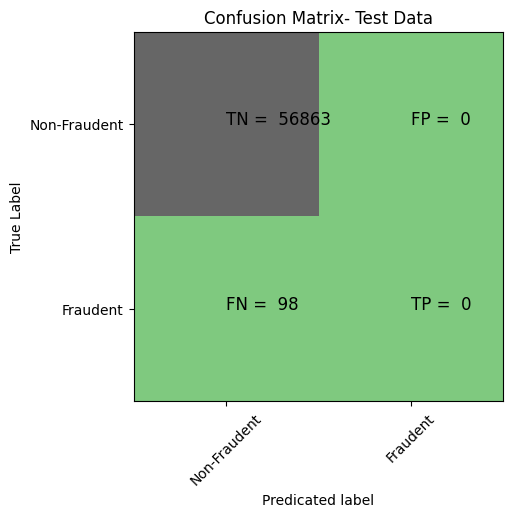

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value:0.9740284292321646
l2 threshold : 0.6115468403459997
ROC for the test dataset 97.4%


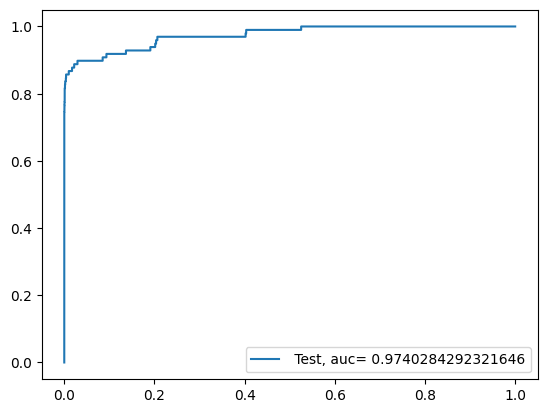

l1 roc_value:0.5
l1 threshold:1.5
ROC for the test dataset 50.0%


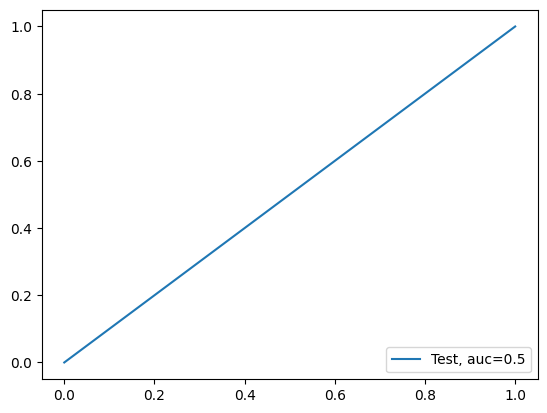

Time Taken by Model: ---- 357.4210395812988 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


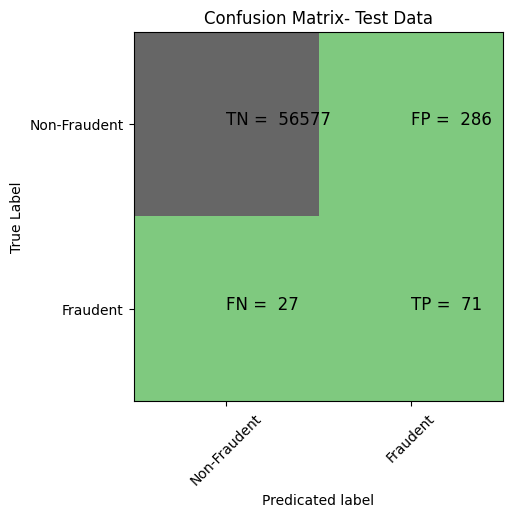

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value:0.8601937811862167
 KNN threshold : 0.6
ROC for the test dataset 86.0%


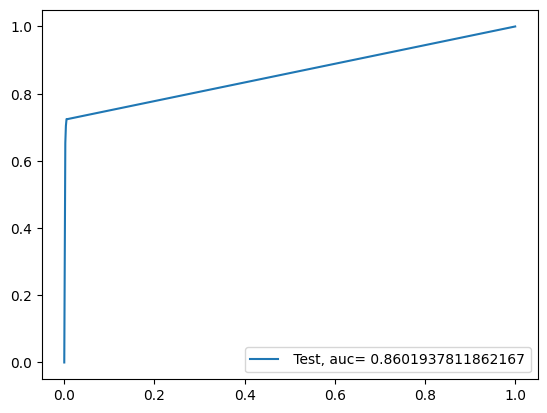

Time Taken by Model: ---- 290.052551984787 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' &'entropy' criteria 
gini score:0.9979459630273345
Confusion Matrix


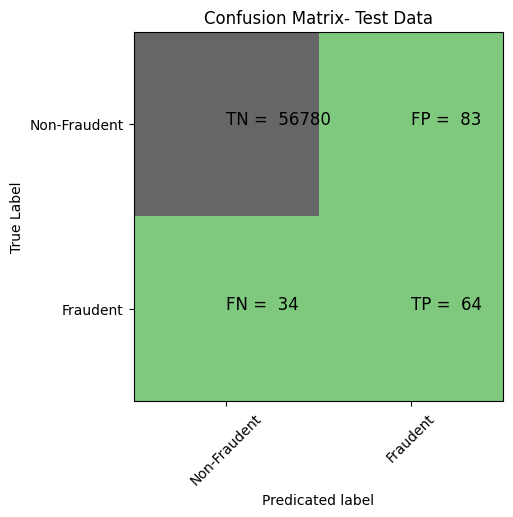

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8258007879303172
 Tree threshold : 1.0
ROC for the test dataset 82.6%


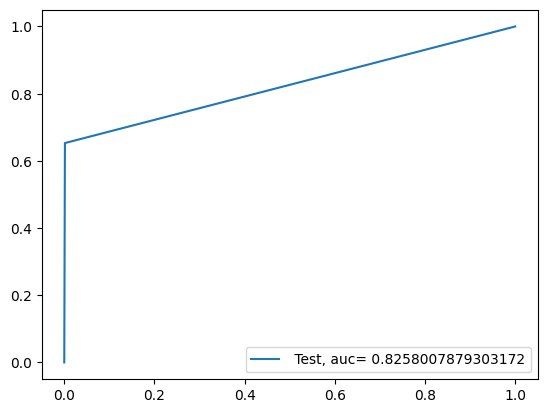

entropy score:0.9954179175225154
Confusion Matrix


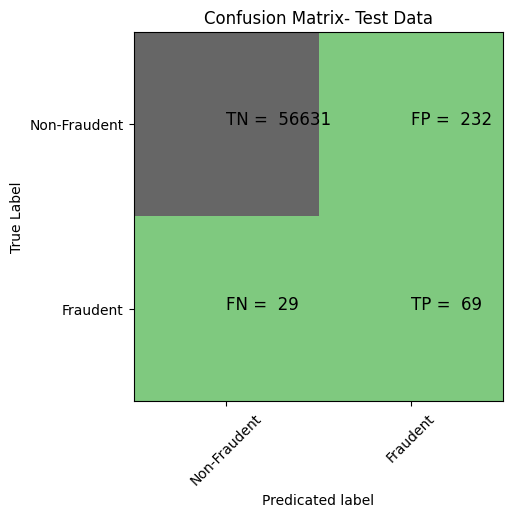

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8500008254713172
 Tree threshold : 1.0
ROC for the test dataset 85.0%


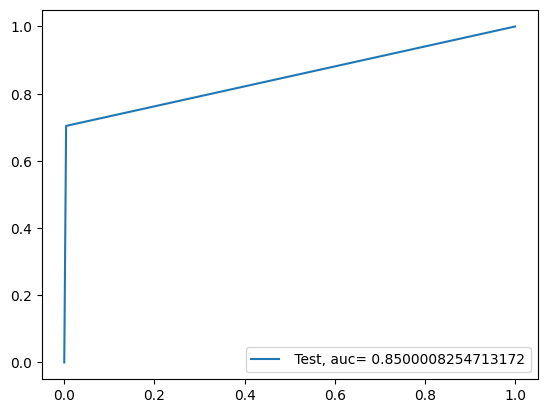

Time Taken by Model: ---- 69.62340712547302 seconds ----
------------------------------------------------------------
Random Forest Model
Model Accuracy:0.9995259914678464
Confusion Matrix


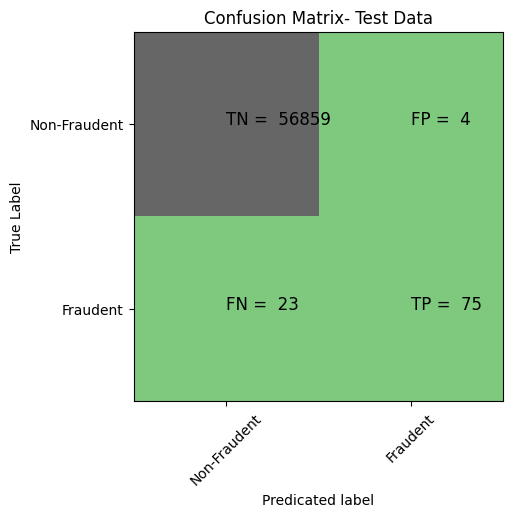

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9632269575962563
 Random Forest threshold : 0.03
ROC for the test dataset 96.3%


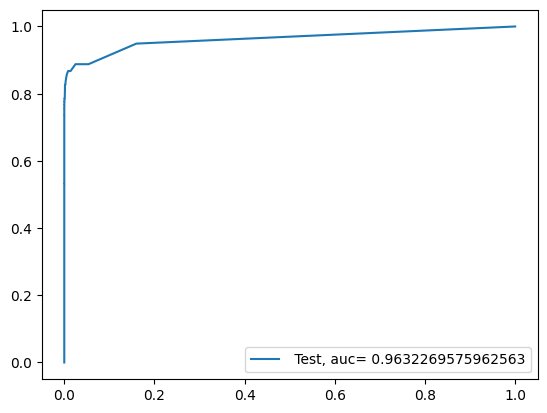

Time Taken by Model: ---- 360.34140396118164 seconds ----
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9993855444953564
Confusion Matrix


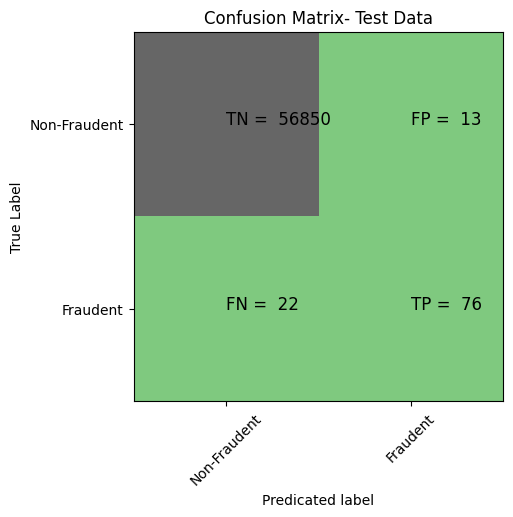

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value:0.9703206274156251
 XGBoost threshold : 0.0016992067685350776
ROC for the test dataset 97.0%


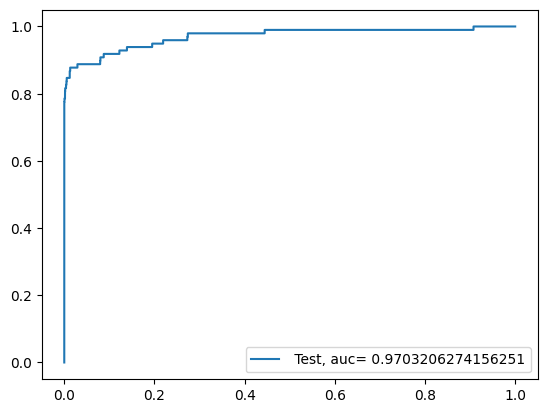

Time Taken by Model: ---- 206.74996304512024 seconds ----
------------------------------------------------------------


In [50]:
Data_Imbalance_Handling   ="ADASYN Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 and L2 Regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' &'entropy' criteria
print("Decision Tree Models with 'gini' &'entropy' criteria ")
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results=buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results=buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
print('-'*60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time=time.time()
# df_Results=buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
# print("Time Taken by Model: ---- %s seconds ----"%(time.time()-start_time))
# print('-'*60)

In [55]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.999105,0.965520,0.004608
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998929,0.888824,0.049544
2,RepeatedKFold Cross Validation,KNN,0.999228,0.868729,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.926815,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999210,0.902693,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.959977,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.978438,0.000237
7,RepeatedKFold Cross Validation,SVM,0.998280,0.483191,0.002763
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087


## Results for ADASYN Oversampling with StratifiedKFold:
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling and StratifiedKFold technique

## Overall conclusion after running the models on Oversampled data:
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

# Hyperparameter Tuning

## HPT-XGBoost Regression

In [56]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_test={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1, 0.125, 0.15, 0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1=RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',colsample_bylevel=1,
                                                      colsample_bynode=1, max_delta_step=0,
                                                      missing=None, n_jobs=-1,
                                                      nthread=None, objective='binary:logistic', random_state=42,
                                                      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                      silent=None, verbosity=1),
                                  param_distributions=param_test, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 85.27566953, 109.93502159,  39.37870698,  40.54486055,
          58.64798369]),
  'std_fit_time': array([0.65239998, 0.87382671, 0.53614913, 1.26006175, 6.56172618]),
  'mean_score_time': array([0.01929502, 0.01383276, 0.01414857, 0.01364551, 0.00959291]),
  'std_score_time': array([0.0103883 , 0.00697615, 0.00499764, 0.00569823, 0.00208955]),
  'param_subsample': masked_array(data=[0.9, 0.7, 0.9, 0.9, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 5, 1, 5, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[7, 9, 3, 3, 5],
               mask=[False, False, False, Fal

Please note that the hyperparamters found above using RandomizedSearchCV and the hypperparameters used below in creating the final model might be different, the reason being. I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost.sklearn import XGBClassifier

clf=XGBClassifier(base_score=0.5, booster='gbtree',colsample_bylevel=1,
                colsample_bynode=1,colsample_bytree=0.7, gamma=0.2,
                max_delta_step=0,learning_rate=0.125, max_depth=7,
                min_child_weight=5, missing=None, n_estimators=60, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(X_over, y_over)
XGB_test_score=clf.score(X_test, y_test)
print('Model Accuracy:{0}'.format(XGB_test_score))


# Probabilities for each class
XGB_probs=clf.predict_proba(X_test)[:,1]

# Calculate roc auc
XGB_roc_value=roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value:{0}".format(XGB_roc_value))
fpr,tpr, thresholds=metrics.roc_curve(y_test, XGB_probs)
threshold=thresholds[np.argmax(tpr-fpr)]
print(" XGBoost threshold : {0}".format(threshold))

## Print the important features of the best model to understand the dataset

In [ ]:
imp_var=[]
for i in clf.feature_importances_:
  imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

In [ ]:
# Calculate roc auc
XGB_roc_value=roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value:{0}".format(XGB_roc_value))
fpr,tpr, thresholds=metrics.roc_curve(y_test, XGB_probs)
threshold=thresholds[np.argmax(tpr-fpr)]
print(" XGBoost threshold : {0}".format(threshold))

# Conclusion
In the oversample cases, of all the models we build found that the XGBoost model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices:

XGBoost roc_value: 0.9815403079438694 XGBoost threshold: 0.017212325707798

However, of all the models we created we found the Logistic Regression with L2 Regularization for StratifiedKFold cross validation(without any oversampling or undersampling) gave us the best result.